In [111]:
"""
1. import library
2. create datasets (2 binary, 1 multiclass)
3. basic classifiers (SVM, KNN, DT)
4. train and vis
5. random forest (ensemble 1)
6. adaboost (ensemble 2)
7. votingclassifier (ensemble 3)

"""

'\n1. import library\n2. create datasets (2 binary, 1 multiclass)\n3. basic classifiers (SVM, KNN, DT)\n4. train and vis\n5. random forest (ensemble 1)\n6. adaboost (ensemble 2)\n7. votingclassifier (ensemble 3)\n\n'

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

import warnings
warnings.filterwarnings('ignore')


In [113]:
# datasets
n_samples = 2000
n_features = 20
n_classes = 2

random_state = 42
noise_class = 0.3
noise_moon = 0.3
noise_circle = 0.3

X, y = make_classification(n_samples=n_samples,
                    n_features=n_features,
                    n_classes=n_classes,
                    n_repeated=0,
                    n_redundant=0,
                    n_informative=n_features-1,
                    random_state=random_state,
                    n_clusters_per_class=1,
                    flip_y=noise_class)

<AxesSubplot:xlabel='0', ylabel='1'>

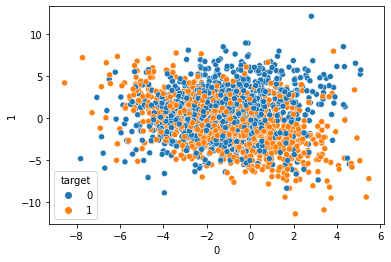

In [114]:
data = pd.DataFrame(X)
data["target"] = y
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data=data)

In [115]:
data_classification = (X, y)

In [116]:
moon = make_moons(n_samples=n_samples,
                  noise = noise_moon,
                  random_state=random_state)

<AxesSubplot:xlabel='0', ylabel='1'>

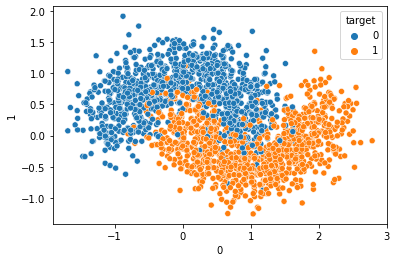

In [117]:
data = pd.DataFrame(moon[0])
data["target"] = moon[1]
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data=data)

In [118]:
circle = make_circles(n_samples=n_samples,
                    factor=0.1,
                  noise = noise_circle,
                  random_state=random_state)

<AxesSubplot:xlabel='0', ylabel='1'>

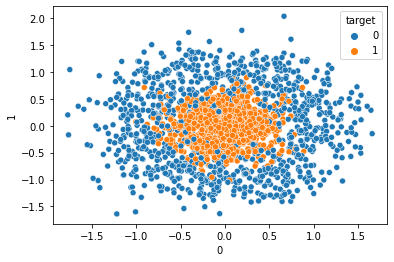

In [119]:
data = pd.DataFrame(circle[0])
data["target"] = circle[1]
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data=data)

In [120]:
datasets = [moon, circle]

In [121]:
# KNN, SVM, DT

names = ["SVC","KNN","Decision Tree","Random Forest", "AdaBoost", "V1"]

svc = SVC()
knn = KNeighborsClassifier(n_neighbors=15)
dt = DecisionTreeClassifier(random_state=random_state, max_depth=2)

n_estimators=10
rf = RandomForestClassifier(n_estimators=n_estimators, random_state = random_state, max_depth=2)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=n_estimators, random_state=random_state)
v1 = VotingClassifier(estimators=[('svc',svc),('knn',knn),('dt',dt),('rf',rf),('ada',ada)])

classifiers = [svc, knn, dt, rf, ada, v1]

Dataset # 0
SVC: test set score: 0.91375 
SVC: train set score: 0.915 

KNN: test set score: 0.90375 
KNN: train set score: 0.9291666666666667 

Decision Tree: test set score: 0.8875 
Decision Tree: train set score: 0.9 

Random Forest: test set score: 0.8875 
Random Forest: train set score: 0.895 

AdaBoost: test set score: 0.8825 
AdaBoost: train set score: 0.9283333333333333 

V1: test set score: 0.91 
V1: train set score: 0.92 

-------------------------------------
Dataset # 1
SVC: test set score: 0.89 
SVC: train set score: 0.9116666666666666 

KNN: test set score: 0.88375 
KNN: train set score: 0.9058333333333334 

Decision Tree: test set score: 0.73125 
Decision Tree: train set score: 0.7675 

Random Forest: test set score: 0.87875 
Random Forest: train set score: 0.91 

AdaBoost: test set score: 0.88125 
AdaBoost: train set score: 0.9133333333333333 

V1: test set score: 0.895 
V1: train set score: 0.9125 

-------------------------------------


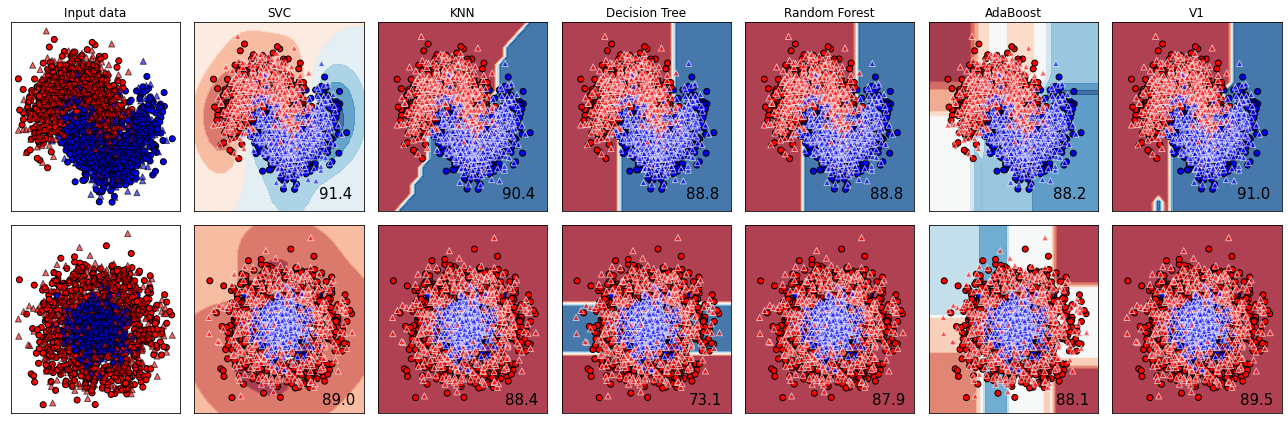

In [122]:
h = 0.2
i = 1

figure = plt.figure(figsize=(18, 6))


for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = RobustScaler().fit_transform(X) # normaly firstly train-test-split after scaling
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=random_state)

    # mash grid 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

    if ds_cnt == 0:
        ax.set_title("Input data")

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,marker = '^', edgecolors='k')

    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    print("Dataset # {}".format(ds_cnt))

    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  
        score = clf.score(X_test, y_test) 
        print("{}: test set score: {} ".format(name, score)) 
        score_train = clf.score(X_train, y_train)  
        print("{}: train set score: {} ".format(name, score_train))
        print()

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,marker = '^',
                   edgecolors='white', alpha=0.6)

        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score),
                size=15, horizontalalignment='right')
        i += 1
    print("-------------------------------------")

plt.tight_layout()
plt.show()

In [123]:
def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        score_train = clf.score(X_train, y_train)  
        print("{}: train set score: {} ".format(name, score_train))
        print()

print("Dataset # 2")   
make_classify(data_classification, classifiers,names)  

Dataset # 2
SVC: test set score: 0.86125 
SVC: train set score: 0.8666666666666667 

KNN: test set score: 0.855 
KNN: train set score: 0.8558333333333333 

Decision Tree: test set score: 0.69625 
Decision Tree: train set score: 0.7133333333333334 

Random Forest: test set score: 0.78125 
Random Forest: train set score: 0.8083333333333333 

AdaBoost: test set score: 0.78 
AdaBoost: train set score: 0.8575 

V1: test set score: 0.85125 
V1: train set score: 0.8575 



In [124]:
"""
svm feature is more functional when the number of features increases
svm is memory efficant 
interpreting svm results is not very easy

knn is not require training
knn is susceptible to outliers
knn used in multiclass problem 

the biggest problem of decision trees is overfitting
dc is susceptible to outliers

random forest used for overfititng (bagging)
boosting algorithm for bias problem
"""

'\nsvm feature is more functional when the number of features increases\nsvm is memory efficant \ninterpreting svm results is not very easy\n\nknn is not require training\nknn is susceptible to outliers\nknn used in multiclass problem \n\nthe biggest problem of decision trees is overfitting\ndc is susceptible to outliers\n\n'

### Random Forest

![Screenshot 2023-08-08 101125.png](<attachment:Screenshot 2023-08-08 101125.png>)
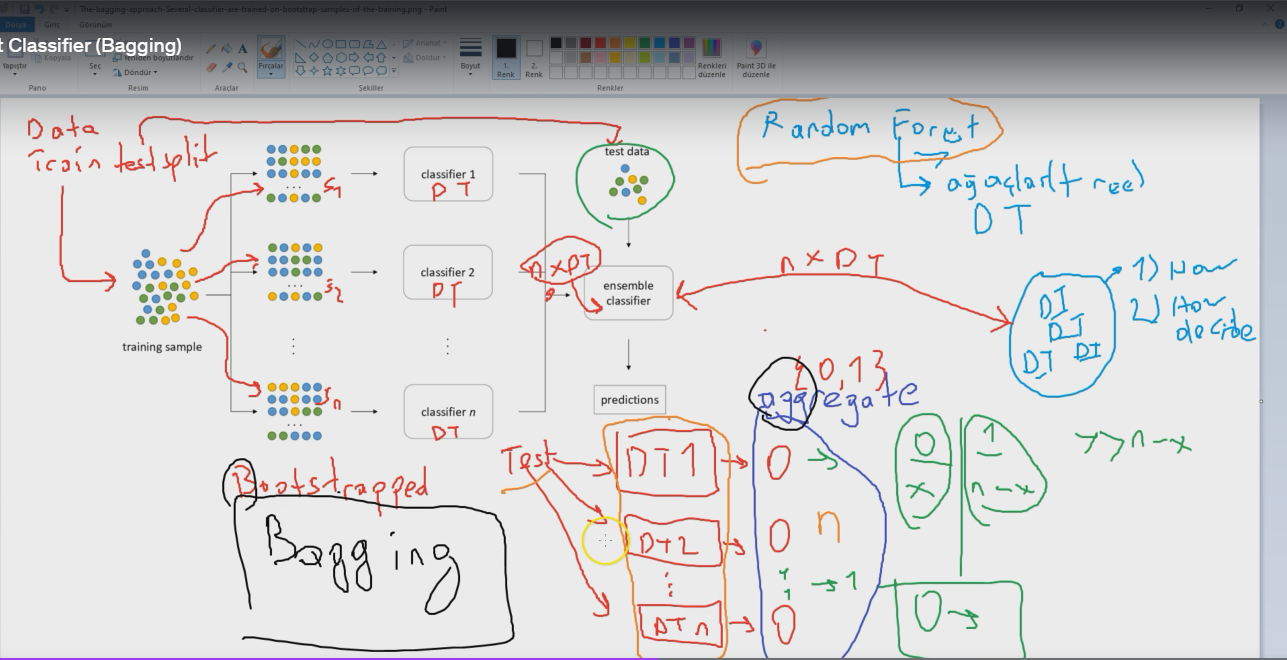